# Using Queries

Queries are a new user friendly way to use Textract by asking questions and getting answer. 

## Installation

To begin, install the `amazon-textract-textractor` package using pip.

`pip install amazon-textract-textractor`

There are various sets of dependencies available to tailor your installation to your use case. The base package will have sensible default, but you may want to install the PDF extra dependencies if your workflow uses PDFs with `pip install amazon-textract-textractor[pdfium]`. You can read more on extra dependencies [in the documentation](https://aws-samples.github.io/amazon-textract-textractor/installation.html)

## Examples of queries

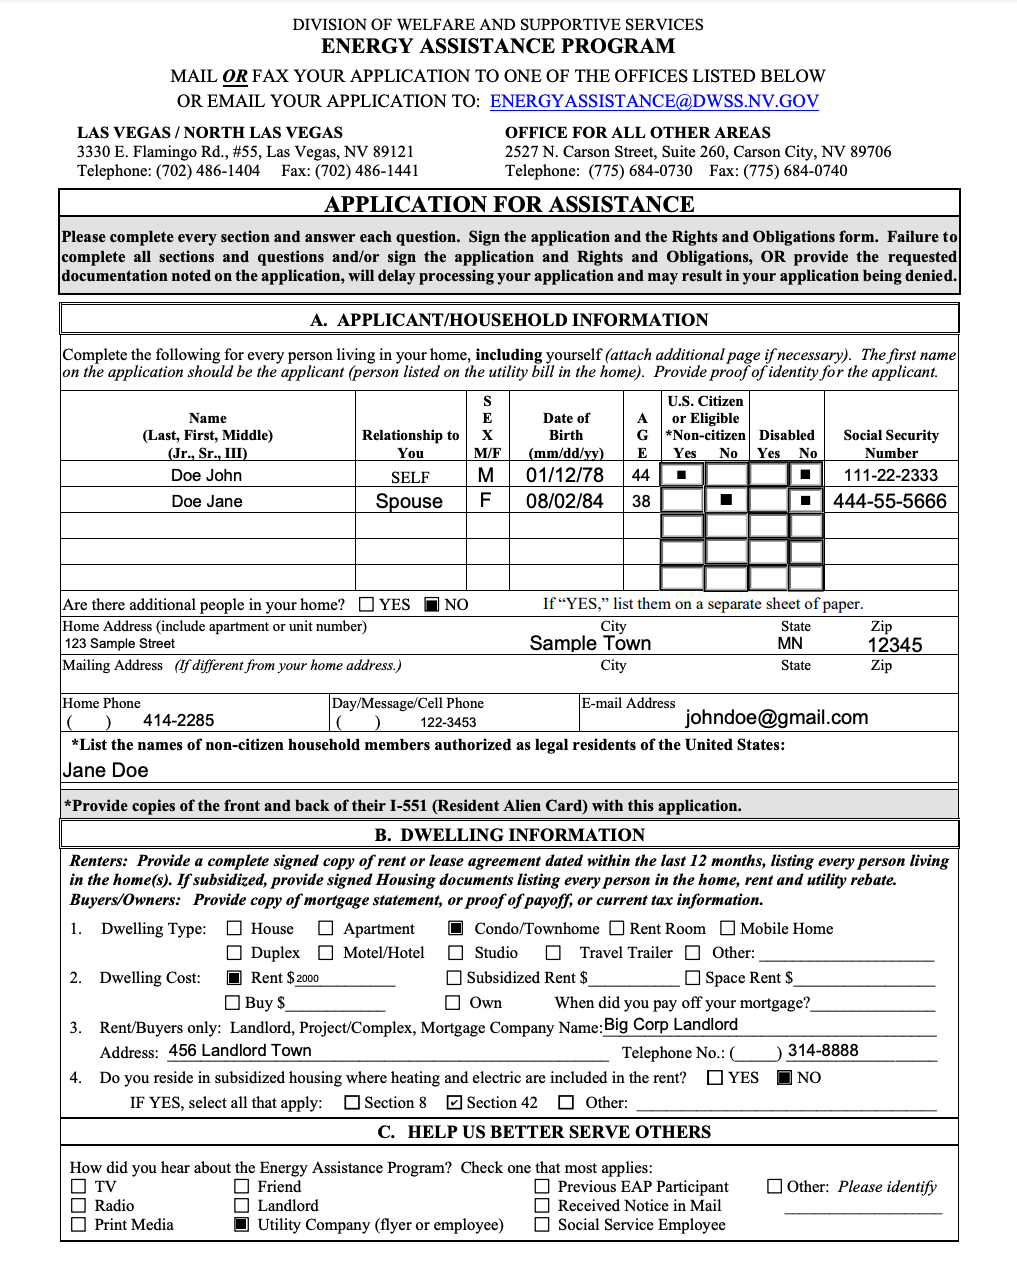

In [2]:
from PIL import Image
Image.open("../../../tests/fixtures/form.png")

This form contains several fields and the Queries API allows us to "ask" 15 questions when using the synchronous API and 30 questions when using the asynchronous API.

From the above we will ask the following questions:

In [6]:
queries = [
    "How many persons are there in the household?",
    "What is the home phone number?",
    "Are any household members non-citizen?",
    "Are any household members disabled?",
    "Where is the household located?",
    "What is the email address?",
    "What is the address of the landlord?",
    "What is the telephone number of the landlord",
    "What is the dwelling type?",
    "What is the dwelling cost?",
    "How did we hear about the Energy Assistance Program?"
]

## Calling Textract

In [7]:
import os
from textractor import Textractor
from textractor.data.constants import TextractFeatures

extractor = Textractor(profile_name="default")
document = extractor.analyze_document(
    file_source=Image.open("../../../tests/fixtures/form.png"),
    features=[TextractFeatures.QUERIES],
    queries=queries
)

In [8]:
document.queries

[How many persons are there in the household?,
 What is the home phone number? ( ) 414-2285,
 Are any household members non-citizen? Yes,
 Are any household members disabled? No,
 Where is the household located? Sample Town,
 What is the email address? johndoe@gmail.com,
 What is the address of the landlord? 456 Landlord Town,
 What is the telephone number of the landlord (702)486-1404,
 What is the dwelling type? Condo/Townhome,
 What is the dwelling cost? Rent $ 2000,
 How did we hear about the Energy Assistance Program? Utility Company (flyer or employee)]

In [18]:
for query in document.queries:
    if query.result:
        print(f"{query.query}\n\tAnswer: {query.result.answer}\n\tConfidence: {query.result.confidence}\n")
    else:
        print(f"{query.query}\n\tNo Answer\n")

How many persons are there in the household?
	No Answer

What is the home phone number?
	Answer: ( ) 414-2285
	Confidence: 0.94

Are any household members non-citizen?
	Answer: Yes
	Confidence: 0.58

Are any household members disabled?
	Answer: No
	Confidence: 0.47

Where is the household located?
	Answer: Sample Town
	Confidence: 0.65

What is the email address?
	Answer: johndoe@gmail.com
	Confidence: 0.98

What is the address of the landlord?
	Answer: 456 Landlord Town
	Confidence: 0.97

What is the telephone number of the landlord
	Answer: (702)486-1404
	Confidence: 0.67

What is the dwelling type?
	Answer: Condo/Townhome
	Confidence: 0.98

What is the dwelling cost?
	Answer: Rent $ 2000
	Confidence: 0.55

How did we hear about the Energy Assistance Program?
	Answer: Utility Company (flyer or employee)
	Confidence: 0.89



## Conclusion

Queries are a powerful and inexpensive solution for processing a smaller number of keys and values. However, you can run into issues where the result is wrong either because the question requires a higher-level understanding, as with "How many people are there in the household?". We recommend testing your workflow with some real samples and fine-tuning your queries to fit your use case.